In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
   

training_set = train_datagen.flow_from_directory('fruits-360-original-size/fruits-360-original-size/Training',
                                                 target_size = (64, 64),
                                                
    batch_size=32,
    class_mode = 'categorical',)

Found 6231 images belonging to 24 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('fruits-360-original-size/fruits-360-original-size/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3110 images belonging to 24 classes.


In [4]:
test_set.classes

array([ 0,  0,  0, ..., 23, 23, 23])

In [5]:
cnn = tf.keras.models.Sequential()


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [9]:
cnn.add(tf.keras.layers.Flatten())



In [10]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=24, activation='softmax'))

cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
195/195 [==============================] - 132s 673ms/step - loss: 0.9493 - accuracy: 0.6936 - val_loss: 0.1469 - val_accuracy: 0.9534
Epoch 2/40
195/195 [==============================] - 58s 298ms/step - loss: 0.2234 - accuracy: 0.9236 - val_loss: 0.1037 - val_accuracy: 0.9518
Epoch 3/40
195/195 [==============================] - 56s 289ms/step - loss: 0.0771 - accuracy: 0.9742 - val_loss: 0.0360 - val_accuracy: 0.9881
Epoch 4/40
195/195 [==============================] - 57s 293ms/step - loss: 0.1040 - accuracy: 0.9655 - val_loss: 0.0352 - val_accuracy: 0.9884
Epoch 5/40
195/195 [==============================] - 59s 301ms/step - loss: 0.0167 - accuracy: 0.9961 - val_loss: 0.0097 - val_accuracy: 0.9974
Epoch 6/40
195/195 [==============================] - 60s 305ms/step - loss: 0.0383 - accuracy: 0.9870 - val_loss: 0.0955 - val_accuracy: 0.9653
Epoch 7/40
195/195 [==============================] - 57s 294ms/step - loss: 0.1039 - accuracy: 0.9705 - val_loss: 0.0034 - val_a

In [18]:
import numpy as np

from keras.preprocessing import image
test_image = tf.keras.utils.image_dataset_from_directory('fruits-360-original-size/fruits-360-original-size/Test',
labels="inferred",
label_mode="categorical",
class_names=None,    
color_mode="rgb",
batch_size=32,
image_size=(64, 64),
shuffle=True,
seed=None,
validation_split=None,
subset=None,
interpolation="bilinear",
follow_links=False,
crop_to_aspect_ratio=False
    )                                                  

    

Found 3110 files belonging to 24 classes.


In [19]:

test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

98/98 [==============================] - 13s 131ms/step - loss: 1.0988e-04 - accuracy: 1.0000
Test accuracy: 1.0


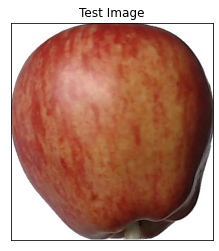

In [31]:
#Test Image Visualization
import matplotlib.pyplot as plt
import cv2
image_path = 'fruits-360-original-size/fruits-360-original-size/Test/apple_red_1/r0_3.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:


# Reverse class_indices to create an index-to-class mapping
print("Class Indices Mapping:", test_set.class_indices)
print("Index to Class Mapping:", index_to_class)


# Predict the class of the test image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
input_arr = input_arr / 255.0
# Convert single image to a batch.

 # Get the index of the predicted class




Class Indices Mapping: {'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}
Index to Class Mapping: {0: 'apple_6', 1: 'apple_braeburn_1', 2: 'apple_crimson_snow_1', 3: 'apple_golden_1', 4: 'apple_golden_2', 5: 'apple_golden_3', 6: 'apple_granny_smith_1', 7: 'apple_hit_1', 8: 'apple_pink_lady_1', 9: 'apple_red_1', 10: 'apple_red_2', 11: 'apple_red_3', 12: 'apple_red_delicios_1', 13: 'apple_red_yellow_1', 14: 'apple_rotten_1', 15: 'cabbage_white_1', 16: 'carrot_1', 17: 'cucumber_1', 18: 'cucumber_3', 19: 'eggplant_violet_1', 20: 'pear_1', 21: 'pear_3'

In [33]:
predictions = cnn.predict(input_arr)
print("Prediction Probabilities:", predictions)
result_index = np.argmax(predictions)
class_name = index_to_class[result_index]
print("Predicted Class Name:", class_name)
  # Get the index of the predicted class


Prediction Probabilities: [[3.7594531e-22 2.5097392e-05 1.1034855e-11 4.7424879e-22 6.3831205e-24
  1.8606847e-18 1.5348307e-19 6.3073428e-14 2.0041682e-16 9.9997437e-01
  4.4992143e-07 6.8868675e-11 2.4313221e-10 2.1256167e-11 4.4140151e-14
  1.2487488e-23 2.2662345e-12 6.9364919e-21 3.3711094e-22 1.1887050e-14
  6.0133988e-19 7.0781440e-18 3.3341561e-25 7.4073726e-17]]
Predicted Class Name: apple_red_1


In [29]:
result_index = np.argmax(predictions)
print(result_index)

17


It's a apple_red_1


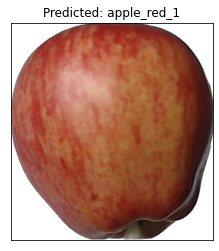

In [34]:
# Get the class name from the index_to_class mapping
class_name = index_to_class[result_index]
print("It's a {}".format(class_name))

# Visualize the test image again for reference
plt.imshow(img)
plt.title(f"Predicted: {class_name}")
plt.xticks([])
plt.yticks([])
plt.show()